In [1]:
# import requirements library
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [2]:
# load dataset
data = pd.read_csv("./data/hypertension_data.csv")

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,51.0,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1
6,42.0,0.0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,38.0,0.0,1,120,263,0,1,173,0,0.0,2,0,3,1
8,72.0,0.0,2,172,199,1,1,162,0,0.5,2,0,3,1
9,47.0,0.0,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# numerical summary of basic statistic of dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# check the class distribution
data.groupby('target').size()

target
0    11809
1    14274
dtype: int64

In [6]:
train, test = train_test_split(data, test_size = 0.2, stratify = data['target'], random_state = 123)

In [7]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8499,66.0,1.0,1,130,234,0,0,175,0,0.6,1,0,2,1
10491,65.0,1.0,1,130,234,0,0,175,0,0.6,1,0,2,1
3569,50.0,0.0,0,140,261,0,0,186,1,0.0,2,0,2,1
13313,47.0,0.0,0,120,188,0,1,113,0,1.4,1,1,3,0
10396,55.0,1.0,3,138,282,1,0,174,0,1.4,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,68.0,1.0,1,120,295,0,1,162,0,0.0,2,0,2,1
10309,61.0,1.0,1,130,204,0,0,202,0,0.0,2,0,2,1
16083,36.0,0.0,0,140,239,0,1,160,0,1.2,2,0,2,1
1810,52.0,0.0,2,105,240,0,0,154,1,0.6,1,0,3,1


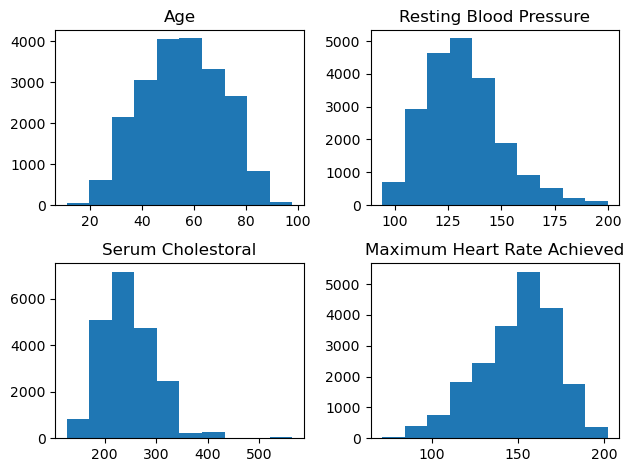

In [8]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['age'], bins = n_bins);
axs[0,0].set_title('Age');
axs[0,1].hist(train['trestbps'], bins = n_bins);
axs[0,1].set_title('Resting Blood Pressure');
axs[1,0].hist(train['chol'], bins = n_bins);
axs[1,0].set_title('Serum Cholestoral');
axs[1,1].hist(train['thalach'], bins = n_bins);
axs[1,1].set_title('Maximum Heart Rate Achieved');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

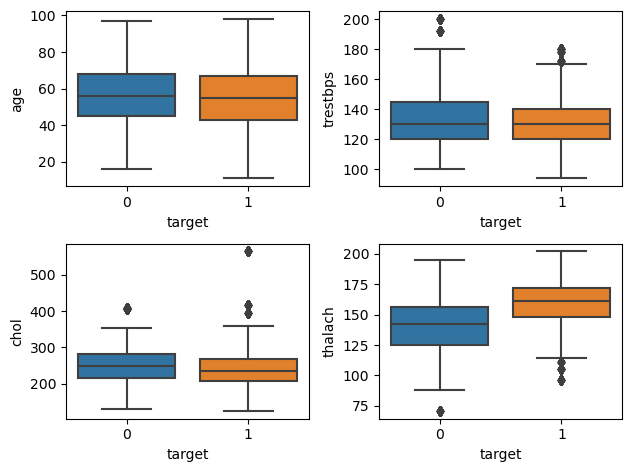

In [9]:
fig, axs = plt.subplots(2, 2)
fn = ["age", "trestbps", "chol", "thalach"]
cn = [0, 1]
sb.boxplot(x = 'target', y = 'age', data = train, order = cn, ax = axs[0,0]);
sb.boxplot(x = 'target', y = 'trestbps', data = train, order = cn, ax = axs[0,1]);
sb.boxplot(x = 'target', y = 'chol', data = train, order = cn, ax = axs[1,0]);
sb.boxplot(x = 'target', y = 'thalach', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

In [10]:
X_train = train[['age','trestbps','chol','thalach']]
y_train = train.target
X_test = test[['age','trestbps','chol','thalach']]
y_test = test.target

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

mod_dt = DecisionTreeClassifier(max_depth = 5, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.779


In [12]:
mod_dt.feature_importances_

array([0.        , 0.089058  , 0.30222127, 0.60872073])

In [13]:
fn = ['age','trestbps','chol','thalach']
cn = ['0', '1']

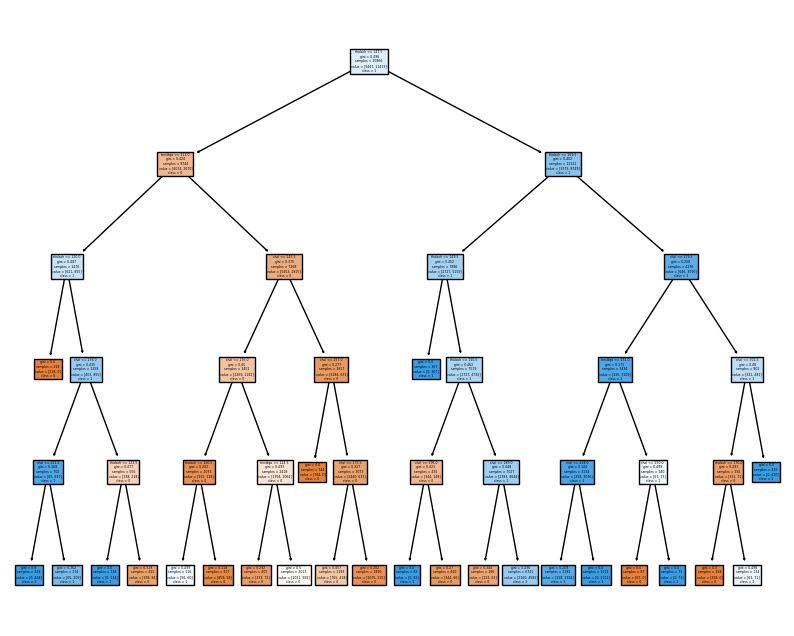

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

<h3>Random Forest</h3>

In [15]:
y_train

8499     1
10491    1
3569     1
13313    0
10396    0
        ..
8100     1
10309    1
16083    1
1810     1
7175     0
Name: target, Length: 20866, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=50, random_state=123)
rf_class.fit(X_train, y_train)
y_pred = rf_class.predict(X_test)

In [17]:
print("The accuracy of the Random Forest is","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Random Forest is 1.000


<h3>KNN</h3>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

mod_knn = KNeighborsClassifier(n_neighbors=10)
mod_knn.fit(X_train, y_train)
knn_predict = mod_knn.predict(X_test)

In [19]:
print("The accuracy of the KNN is","{:.3f}".format(metrics.accuracy_score(knn_predict,y_test)))

The accuracy of the KNN is 0.989


<h3>SVM</h3>

In [23]:
from sklearn.svm import SVC
from sklearn import metrics

# Define the SVC model with the provided parameters
mod_svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
              shrinking=True, probability=False, tol=0.001, cache_size=200, 
              class_weight=None, verbose=False, max_iter=-1, 
              decision_function_shape='ovr', break_ties=False, random_state=None)

# Fit the model to the training data
mod_svc.fit(X_train, y_train)

# Make predictions on the test data
svc_predict = mod_svc.predict(X_test)

# Evaluate the model's performance
svc_accuracy = metrics.accuracy_score(svc_predict, y_test)
print(f"The accuracy of the SVC is {svc_accuracy:.3f}")

The accuracy of the SVC is 0.752


<h3>Grid Search</h3>

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)

In [31]:
grid_search.best_params_

{'max_features': 0.7500000000000002, 'n_estimators': 10}

In [32]:
grid_search.best_score_

0.999998057533864

<h3>Randomize</h3>

In [26]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, scoring='r2', verbose=1)

In [27]:
random_search.best_params_

{'n_estimators': 95, 'max_features': 0.8000000000000002}

In [29]:
random_search.best_score_

0.9999975989345329